In [1]:
from __future__ import division

from sympy import *
from sympy.matrices import *

init_printing(use_unicode=True)

In [2]:
n, omega, Lc, Rc = symbols("n \\omega L_c R_c")
gamma, L, Zc = symbols("\\gamma L Z_c")

Let's consider a connection between two devices via transmission line. If the coupling is magnetic, this connection may be represented by the following circuit:

| ![transmission line](./static/Diagram1.png) |
|:--:|
|*Equivalent circuit of the transmission line coupled by the magnetic field*|

When connected like so, resulting matrix may be obtained by a multiplication of the matrices.
$$[A_{SUM}] = [A_{tr1}][A_{wg}][A_{tr2}]$$
Let's find $[A_{SUM}]$

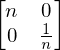

In [3]:
Atr1 = Matrix([[n, 0], [0, 1/n]])
Atr1

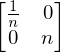

In [4]:
Atr2 = Matrix([[1/n, 0], [0, n]])
Atr2

## Transformation of waveguide $S$ matrix to $A$

We will take a well-known S-matrix form of the transmission line.

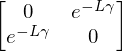

In [5]:
S = Matrix([[0, exp(-gamma*L)], [exp(-gamma*L),0]])
S

where $\gamma = \alpha + i \beta$

And convert it to A form

| $$Z = \sqrt{Z}(I+S)(I-S)^{-1}\sqrt{Z}$$ |
|:---:|
|*S -> Z matrix conversion*|

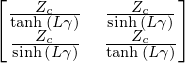

In [6]:
sqrtZ = Matrix([[sqrt(Zc),0],[0,sqrt(Zc)]])
Z = simplify(sqrtZ*(eye(2)+S)*(eye(2)-S).inv()*sqrtZ)
Z

|$$
A =
\begin{bmatrix}
\frac{Z_{11}}{Z_21} & \frac{\det{Z}}{Z_{21}} \\
\frac{1}{Z_{21}} & \frac{Z_{22}}{Z_{21}} \\
\end{bmatrix}
$$|
|:---:|
|*Z -> A matrix conversion*|

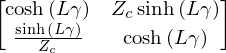

In [7]:
Awg = Matrix([[Z[0,0]/Z[1,0],Z.det()/Z[1,0]],[1/Z[1,0],Z[1,1]/Z[1,0]]])
Awg = simplify(Awg)
Awg

A-matrix of the device is:

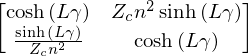

In [8]:
SUM = simplify(Atr1*Awg*Atr2)
SUM

Check, if the determinant is 1.

In [9]:
simplify(SUM[0,0]*SUM[1,1]-SUM[0,1]*SUM[1,0])

It is. So we can use the passive equivalent circuit.

| ![transmission line equivalent circuit](./static/Diagram2.png) |
|:--:| 
|*Equivalent circuit of an A-matrix*|

In [10]:
Z1 = expand(simplify((SUM[0,0]-1)/SUM[1,0]))

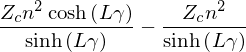

In [11]:
Z1

In [12]:
Z2 = expand(simplify((SUM[1,1]-1)/SUM[1,0]))

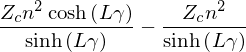

In [13]:
Z2

In [14]:
Z3 = simplify(1/SUM[1,0])

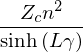

In [15]:
Z3

Frequently $Z_1$ and $Z_2$ are expressed in different forms:

$$
\frac{\cosh{L\gamma}}{\sinh{L\gamma}}-
\frac{1}{\sinh{L\gamma}}
=
\frac{\cosh{L\gamma} - 1}{\sinh{L\gamma}}
=
\tanh{\frac{L\gamma}{2}}
$$

For lossless lines:
$$
\tanh{\frac{i k L}{2}}
=
i \tan{\frac{k L}{2}}
$$
$$
\sinh{i k L}
=
i \sin{k L}
$$